**Tutorial 7 - Numerical Methods SPA623M**

Ordinary Differential Equation and Interpolation

1. ODEs Solving
2. Euler and Runge-Kutta Method
3. Cubic & Linear Spline 

In [1]:
'''Import the libraries'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import solve_ivp

import sympy as sp

**Question 1: ODEs** $\\$

Consider the ordinary differential equation $\frac{dy}{dt} = e^{-t}$, and $\\$

(a) solve for the solution $y(t)$ using Euler Method.

Take initial condition as $y(0)=-1$, and step sizes of 0.1 and 0.01. $\\$

Note: $y_{n+1} = y_n + h*f(x_n,y_n)$, where step size is $h$.$\\$

(b)Plot the true solution, and both approximate solution.



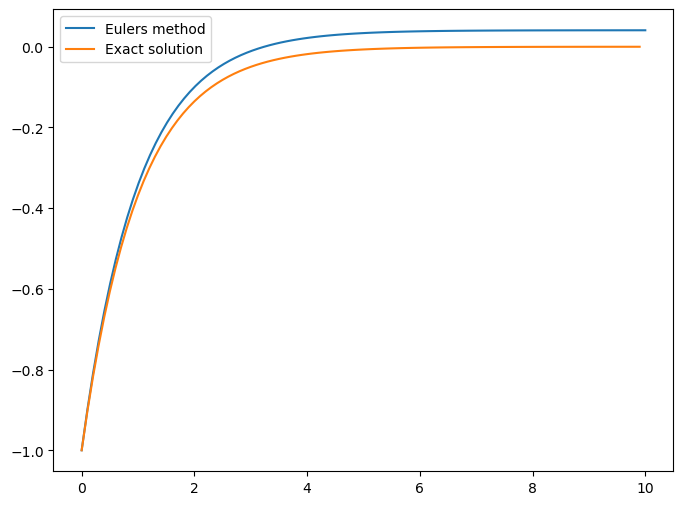

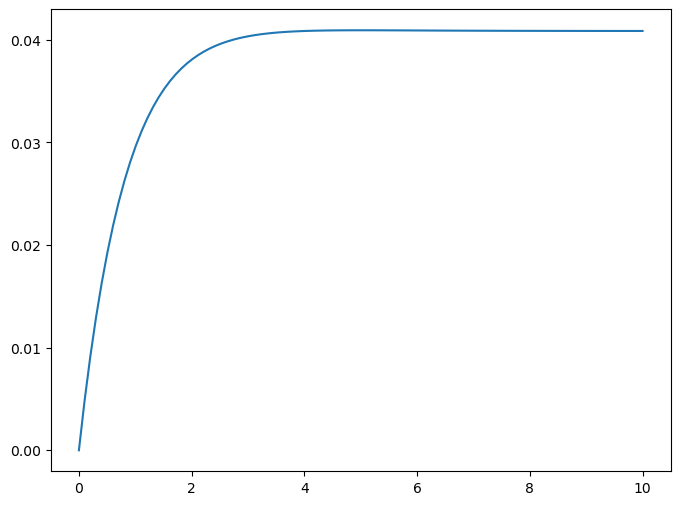

In [23]:
def euler(f,intitial):
    [x0,y0,h,b] = initial
    x = np.linspace(x0,b,int((b-x0)/h))
    y = np.zeros(len(x))
    y[0] = y0
    

    for i in range(len(x)-1):
        y[i+1] = y[i] + h*f(x[i])

    return x,y

def dy_dx(t):
    return pow(np.e,-t)

def f(x):
    return -np.e**(-x)

x0 = 0
y0 = -1
h = 0.1
b = 10
initial = [x0,y0,h,b]

x,y = euler(dy_dx,initial)

plt.figure(figsize = [8,6])
plt.plot(x,y,label="Eulers method")

x_line = np.arange(x0,b,h)
plt.plot(x_line,f(x_line),label="Exact solution")
plt.legend()
plt.title(f"Euler comparision with exact for h = {h}")
plt.show()

plt.figure(figsize = [8,6])
plt.plot(x,y-f(x_line),label="Error")

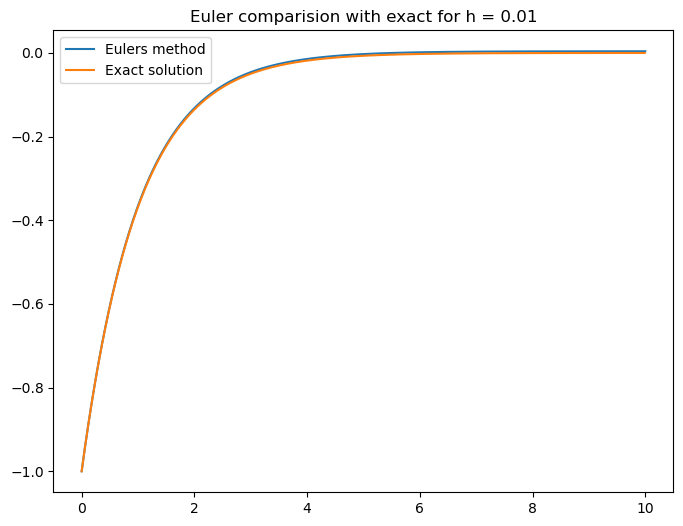

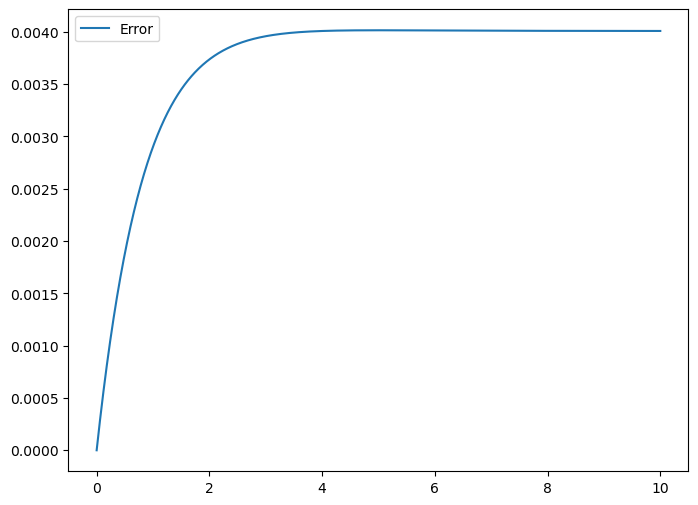

In [27]:
x0 = 0
y0 = -1
h = 0.01
b = 10
initial = [x0,y0,h,b]

x,y = euler(dy_dx,initial)

plt.figure(figsize = [8,6])
plt.plot(x,y,label="Eulers method")

x_line = np.arange(x0,b,h)
plt.plot(x_line,f(x_line),label="Exact solution")
plt.legend()
plt.title(f"Euler comparision with exact for h = {h}")

plt.show()

plt.figure(figsize = [8,6])
plt.plot(x,y-f(x_line),label="Error")
plt.legend()
plt.show()


**Question 2: Cubic Interpolation**$\\$

Given three coordinates  x = [0, 1, 2] & y = [1, 3, 2], plot the data point and cubic interpolated function in the range [0,2].$\\$

Hint: Use `CubicSpline` as `from scipy.interpolate import CubicSpline`

In [22]:
from scipy.interpolate import CubicSpline, interp1d

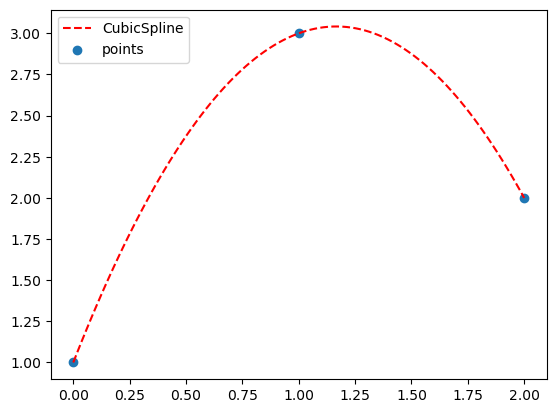

In [31]:
x = [0,1,2]
y = [1,3,2]

cs = CubicSpline(x,y)

xline = np.linspace(0,2,100)

plt.plot(xline,cs(xline),"--r",label = "CubicSpline")
plt.scatter(x,y,label = "points")
plt.legend()
plt.show()

**Question 3: RK4 Method**$\\$

(a) Consider solving the differential equation $\frac{dy}{dt} = cos(t)$, $\\$

with initial condition $y(0) = 0$ using 4th order Runge-Kutta method in interval [0,$\pi$] and h = 0.1. $\\$

Hint: The way we use the solver to solve the differential equation is: `solve_ivp(fun, t_span, s0, method = 'RK45', t_eval=None)` $\\$

(b) Plot solution and the residual, which is true function - solution on  [0,$\pi$].

(c) Repeat the exericse with rtol = 1e-8, atol = 1e-8 in the scipy function.

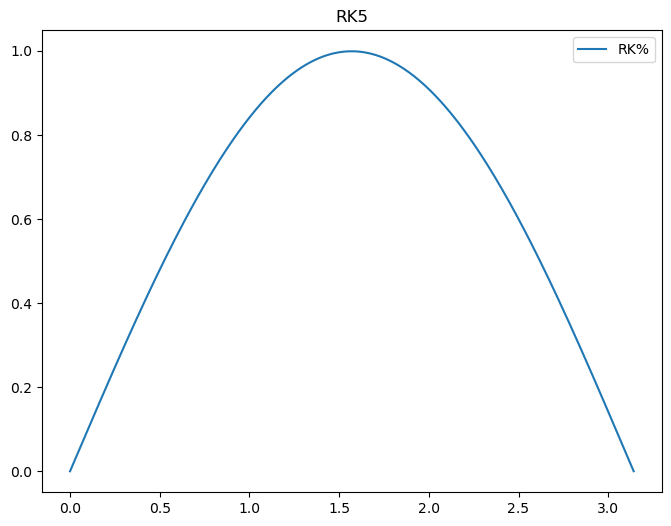

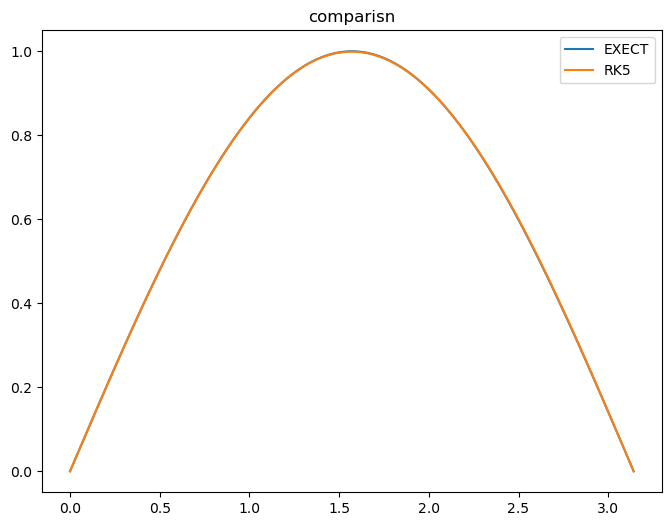

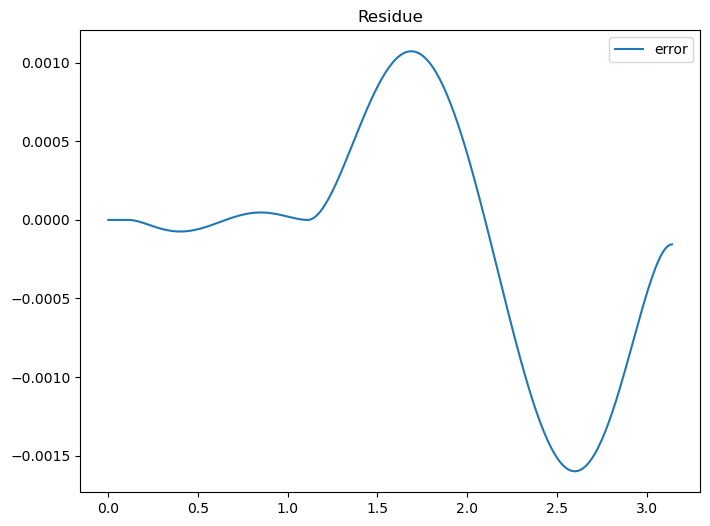

In [5]:
def dydt(t,y):
    return np.cos(t)
a=0
x0 = 0
y0 = 0
h = 0.01
b = np.pi
n=int((b-a)/h)
x = np.linspace(x0, b, n)

sol = solve_ivp(dydt, [x0, b], [y0], method='RK45', t_eval=x)


plt.figure(figsize=[8,6])
plt.plot(x,sol.y[0],label = "RK%")
plt.title("RK5")
plt.legend()

plt.show()

def y(x):
    return np.sin(x)

plt.figure(figsize=[8,6])
plt.plot(x,y(x),label="EXECT")
plt.plot(x,sol.y[0],label = "RK5")
plt.title("comparisn")
plt.legend()
plt.show()

plt.figure(figsize=[8,6])

plt.plot(x,y(x)-sol.y[0],label = "error")
plt.title("Residue")
plt.legend()

plt.show()

In [2]:
def dydx(t,y):
    return np.cos(t)

x0 = 0
y0 = 0
h = 0.01
b = np.pi
n=int((b-a)/h)
x = np.linspace(x0, b, n)
atol = 1e-8
rtol = 1e-8
sol = solve_ivp(dydt, [x0, b], [y0], method='RK45', t_eval=x,rtol=rtol,atol=atol)


plt.figure(figsize=[8,6])
plt.plot(x,sol.y[0],label = "RK%")
plt.title("RK5")
plt.legend()

plt.show()

def y(x):
    return np.sin(x)

plt.figure(figsize=[8,6])
plt.plot(x,y(x),label="EXECT")
plt.plot(x,sol.y[0],label = "RK5")
plt.title("comparisn")
plt.legend()
plt.show()

plt.figure(figsize=[8,6])

plt.plot(x,y(x)-sol.y[0],label = "error")
plt.title("Residue")
plt.legend()

plt.show()

print(max(y(x)-sol.y[0]))

NameError: name 'a' is not defined

**Question 4: Cubic Interpolation vs Linear Interpolation**

Consider a function $f(x) = \frac{1}{1+x^2}$, known in the interval [-10,10] at each integer point.$\\$

(a) Plot the interpolation fucntion in [-10,10] using cubic and linear interpolation using `CubicSpline` and `interp1d` respectively.$\\$

(b) Compute and plot the derivatives $f'(x)$, $f''(x)$ and $f'''(x)$ from the approximation. $\\$

(c) Plot the residuals in each case in (a).


[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]


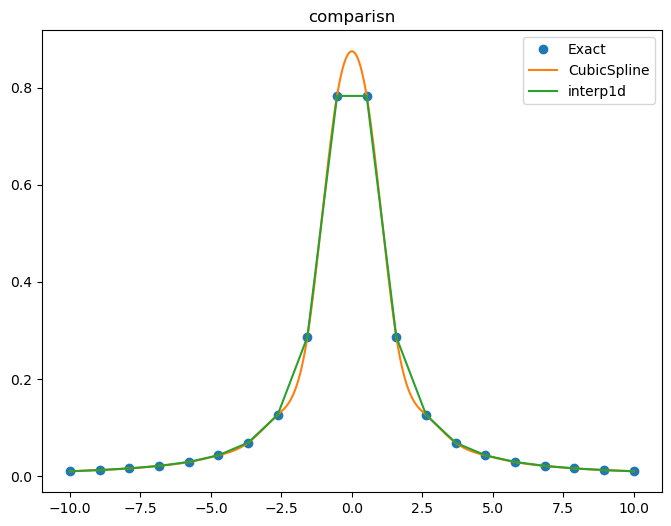

In [38]:
def f(x):
    return 1/(1+x**2)
a = -10
b = 10
h = 1

n = int((b-a)/h)
x = np.linspace(a,b,n)
print(x)

cs = CubicSpline(x,f(x))
ip = interp1d(x,f(x))

xline = np.linspace(a,b,n*100)

plt.figure(figsize=[8,6])
plt.plot(x,f(x),"o",label="Exact")
plt.plot(xline,cs(xline),label = "CubicSpline")
plt.plot(xline,ip(xline),label = "interp1d")

plt.title("comparisn")
plt.legend()
plt.show()


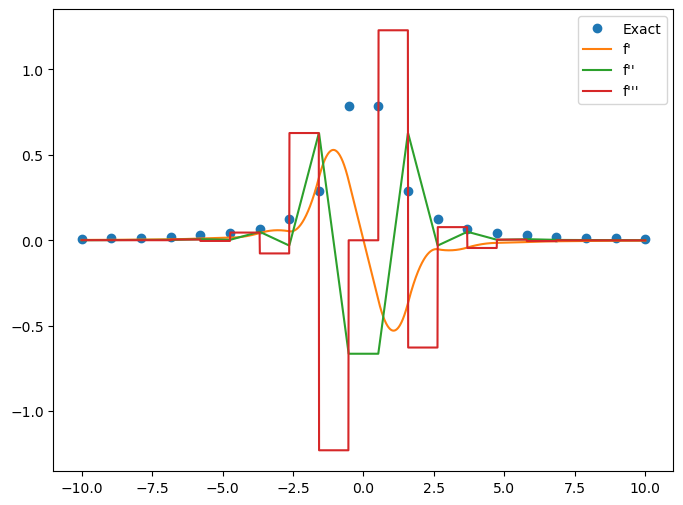

In [36]:

f1 = cs.derivative(nu=1)
f2 = cs.derivative(nu=2)
f3 = cs.derivative(nu=3)

plt.figure(figsize=[8,6])
plt.plot(x,f(x),"o",label="Exact")
plt.plot(xline,f1(xline),label = "f'")
plt.plot(xline,f2(xline),label = "f''")
plt.plot(xline,f3(xline),label = "f'''")
plt.legend()
plt.show()


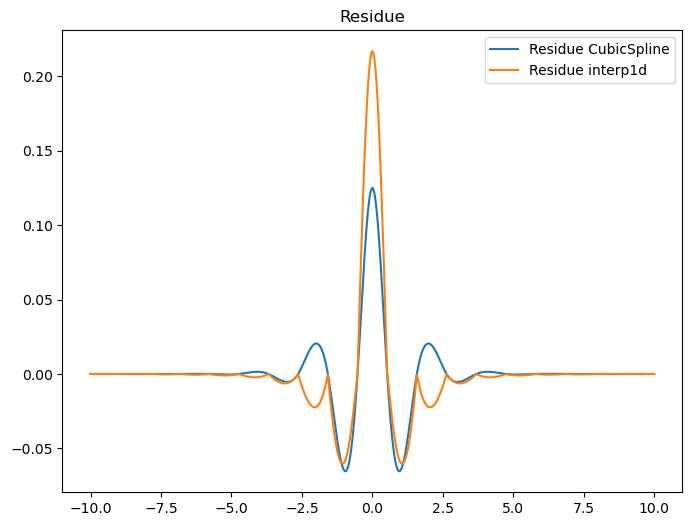

In [41]:
plt.figure(figsize=[8,6])
plt.plot(xline,f(xline)-cs(xline),label="Residue CubicSpline")
plt.plot(xline, f(xline)-ip(xline) ,label = "Residue interp1d")

plt.title("Residue")
plt.legend()
plt.show()
